<a href="https://colab.research.google.com/github/pratik-chakraborty10/Machine_Learning/blob/main/FeatureScaling(Normalization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt





In [4]:
# Step 1: Load the data
df = pd.read_csv('/content/wine_data.csv')

In [5]:
# Step 2: Ensure the column headers are correct
df.columns = df.columns.str.strip()

In [6]:
# Step 3: Inspect the data
print(df.head())
print(df.dtypes)

   class_label  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   color_intensity   hue  OD280/OD315_of_diluted_wines  proline  
0             5.64  1.04                          3.92  

In [7]:
# Step 4: Convert data types and handle non-numeric values
df['alcohol'] = pd.to_numeric(df['alcohol'], errors='coerce')
df['malic_acid'] = pd.to_numeric(df['malic_acid'], errors='coerce')
df['class_label'] = pd.to_numeric(df['class_label'], errors='coerce')

In [8]:
# Drop rows with NaN values
df.dropna(subset=['alcohol', 'malic_acid', 'class_label'], inplace=True)

In [9]:
# Verify data types and absence of NaN values
print(df.dtypes)
print(df.isna().sum())

class_label                       int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
OD280/OD315_of_diluted_wines    float64
proline                           int64
dtype: object
class_label                     0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_dil

In [10]:
# Step 5: Select features and target using column names
X = df[['alcohol', 'malic_acid']]
y = df['class_label']

In [11]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [15]:
np.round(X_train.describe(),1)

,alcohol,malic_acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,13.0,1.9
75%,13.7,3.1
max,14.8,5.8


In [16]:
np.round(X_train_scaled.describe(),1)

,alcohol,malic_acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.1
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


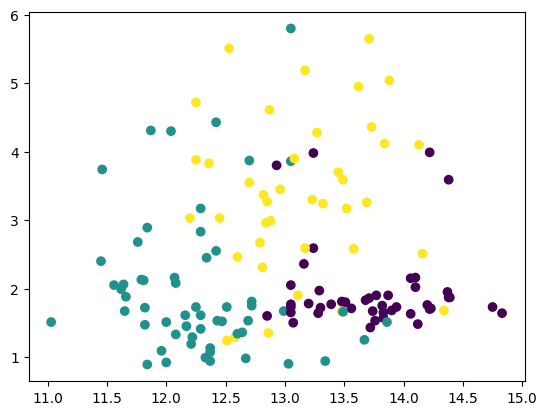

In [19]:
plt.scatter(X_train['alcohol'],X_train['malic_acid'],c=y_train)

plt.show() #before scaling


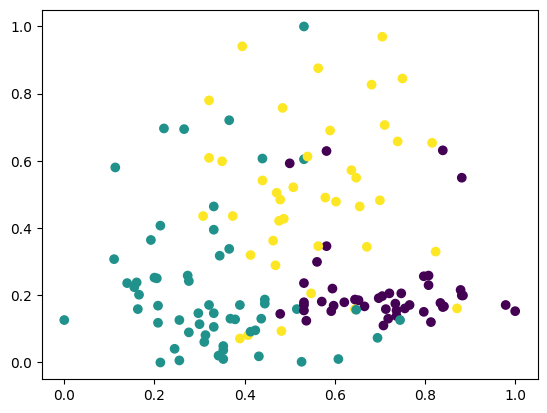

In [20]:
plt.scatter(X_train_scaled['alcohol'],X_train_scaled['malic_acid'],c=y_train) #after scaling